### Exploring January case study ###

Tight margins on Wednesday 8th January 2025.

The conditions leading up to this, the event itself and its associated costs.

In [1]:
# standard libraries
from pathlib import Path

# maths libraries
import numpy as np

# geodata libraries
import pandas as pd

# plotting libraries (not required for the actual calculations)
import matplotlib.pyplot as plt

In [2]:
# Set up the path to the data
price_data_path = Path("/home/users/benhutch/energy-sotcr-2024-2025/price_data/GB electricity data 2024-25.xlsx")

# Load the data from the Excel file
price_data = pd.read_excel(price_data_path, header=2)

In [3]:
price_data.head()

,Date,Time,Nuclear,Biomass,Imports,Hydro,Wind,Solar,Gas,Coal,...,Demand Net (MW),Fossil (MW),Carbon (tCO₂/hr),Carbon (g/kWh),Day Ahead,Realtime,Balancing,Temper-ature (°C),Wind Curtailed,Wind Available
0,2024-04-01,00:00:00,4287.0,2207.0,1430.0,251.0,10287.0,0,3798.0,261,...,12234.0,4059.0,1898.986276,84.320691,27.54,25.050000,17.3313,9.6,9,10296.0
1,2024-04-01,00:30:00,4305.0,2288.0,1151.0,274.0,9893.0,0,3728.0,259,...,12005.0,3987.0,1854.829413,84.703142,26.46,25.650000,17.1431,9.6,0,9893.0
2,2024-04-01,01:00:00,4305.0,2285.0,1586.0,274.0,9529.0,0,3566.0,259,...,12275.0,3825.0,1963.548171,90.054493,25.19,23.990000,17.4830,9.6,0,9529.0
3,2024-04-01,01:30:00,4314.0,2288.0,1986.0,256.0,9524.0,0,3539.0,259,...,12642.0,3798.0,1952.015631,88.063504,33.60,76.000000,19.6611,9.6,0,9524.0
4,2024-04-01,02:00:00,4312.0,2289.0,1252.0,255.0,10066.0,0,3534.0,261,...,11903.0,3795.0,1846.288993,84.040648,47.54,73.384327,19.2696,9.6,0,10066.0


In [4]:
# -------------------
# Formatting the time column
# -------------------

# Convert the 'Date' column to datetime format
price_data['Date'] = pd.to_datetime(price_data['Date'])
# Convert the 'Time' column to datetime format
price_data['Time'] = pd.to_datetime(price_data['Time'], format='%H:%M:%S').dt.time

# Combine 'Date' and 'Time' into a single datetime column
price_data['Datetime'] = pd.to_datetime(price_data['Date'].astype(str) + ' ' + price_data['Time'].astype(str))

# Set the 'Datetime' column as the index
price_data.set_index('Datetime', inplace=True)

# drop the 'Date' and 'Time' columns as they are no longer needed
price_data.drop(columns=['Date', 'Time'], inplace=True)

In [5]:
# -------------------
# Smooth the data
# -------------------

# Aggregate to daily means and smooth the data
daily_price_data = price_data.resample('D').mean()

# Smooth the data using a rolling mean with a window of 5 days
daily_price_data_smoothed = daily_price_data.rolling(
    window=5, min_periods=1, center=True
).mean()

# remove the name for the index
daily_price_data_smoothed.index.name = None

In [31]:
# -------------------
# Set up the date range for the analysis
# -------------------

# Set up the date range for the analysis
event_date = pd.Timestamp("2025-01-08") # 8th January 2025
start_date = event_date - pd.Timedelta(days=5)  # 5 days before
end_date = event_date + pd.Timedelta(days=5)    # 5 days after

# Filter the data for the specified date range
filtered_data = daily_price_data_smoothed.loc[start_date:end_date]

filtered_data_no_smoothing = daily_price_data.loc[start_date:end_date]

# Filtered data hourly
filtered_data_hourly = price_data.loc[start_date:end_date]

# Filer the hourly data to only January 2025
filtered_data_hourly_january = price_data.loc['2025-01']

In [13]:
filtered_data.head()

,Nuclear,Biomass,Imports,Hydro,Wind,Solar,Gas,Coal,Peaking,French,...,Demand Net (MW),Fossil (MW),Carbon (tCO₂/hr),Carbon (g/kWh),Day Ahead,Realtime,Balancing,Temper-ature (°C),Wind Curtailed,Wind Available
2025-01-03,5025.241667,2302.104167,4275.587500,878.966667,11570.366667,472.370833,9600.295833,0.0,2.558333,1840.075000,...,22084.754167,9602.854167,4186.321531,116.056790,94.937917,98.422017,9.556683,3.22,718.745833,12289.112500
2025-01-04,5010.054167,2393.070833,4942.933333,838.345833,11577.500000,529.366667,10519.266667,0.0,3.112500,2227.279167,...,23706.783333,10522.379167,4577.202535,122.738230,103.428083,107.470057,8.037980,2.14,443.279167,12020.779167
2025-01-05,4994.033333,2417.804167,4799.837500,772.658333,12403.712500,505.800000,10828.208333,0.0,3.179167,2263.570833,...,23815.720833,10831.387500,4681.791878,122.962558,102.644833,106.069392,8.024074,2.34,542.912500,12946.625000
2025-01-06,4981.550000,2455.845833,5021.995833,723.120833,11593.779167,366.487500,12103.879167,0.0,79.770833,2332.820833,...,25366.162500,12183.650000,5231.821806,134.210165,151.449292,226.694837,10.672495,1.94,484.141667,12077.920833
2025-01-07,4951.875000,2504.283333,4669.079167,653.270833,12608.370833,544.625000,12570.891667,0.0,81.620833,2414.054167,...,25431.020833,12652.512500,5390.039397,132.782255,151.145708,223.134349,10.715922,1.68,526.554167,13134.925000


In [14]:
# Print the columns of the filtered data
print(filtered_data.columns)

Index(['Nuclear', 'Biomass', 'Imports', 'Hydro', 'Wind', 'Solar', 'Gas',
       'Coal', 'Peaking', 'French', 'Dutch', 'Irish', 'Belgian', 'Norwegian',
       'Danish', 'Storage', 'Gross Imports', 'Gross Exports', 'Demand (MW)',
       'Demand Net (MW)', 'Fossil (MW)', 'Carbon (tCO₂/hr)', 'Carbon (g/kWh)',
       'Day Ahead', 'Realtime', 'Balancing', 'Temper-ature (°C)',
       'Wind Curtailed', 'Wind Available'],
      dtype='object')


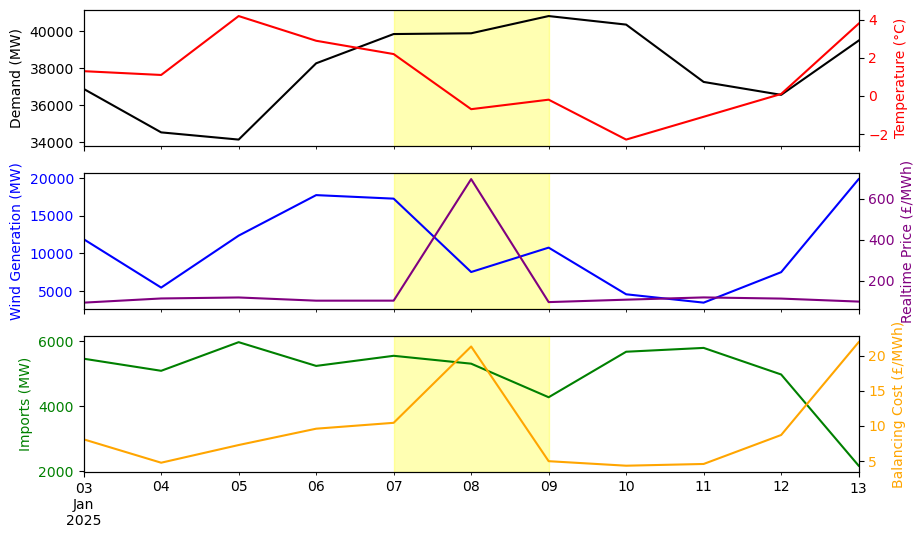

In [15]:
# -------------------
# Plot the demand/T, wind speed and price?
# -------------------

# Set up a figure with three rows and one column
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = ax1.twinx()
ax2 = axs[1]
ax2_b = ax2.twinx()
ax3 = axs[2]
ax3_b = ax3.twinx()

# Plot the demand column
filtered_data_no_smoothing['Demand (MW)'].plot(ax=ax1, color='k', label='Demand')

# Plot the temperature in red on the first subplot
filtered_data_no_smoothing['Temper-ature (°C)'].plot(ax=ax1_b, color='red', label='Temperature')

# Set the labels and title for the first subplot
ax1.set_ylabel('Demand (MW)', fontsize=10, color='k')
ax1_b.set_ylabel('Temperature (°C)', fontsize=10, color='red')

# Highlight the ticks in the correct colours
ax1.tick_params(axis='y', labelcolor='k')
ax1_b.tick_params(axis='y', labelcolor='red')

# Highlight the period of the event in yellow
ax1.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# Plot the wind availability in blue on the second subplot
filtered_data_no_smoothing['Wind Available'].plot(ax=ax2, color='blue', label='Wind Available')

# # Plot the wind curtailed in black
# filtered_data_no_smoothing['Wind Curtailed'].plot(ax=ax2, color='black', label='Wind Curtailed')

# Plot the Realtime price in purple on the second subplot
filtered_data_no_smoothing['Realtime'].plot(ax=ax2_b, color='purple', label='Realtime Price')

# Set the labels and title for the second subplot
ax2.set_ylabel('Wind Generation (MW)', fontsize=10, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2_b.set_ylabel('Realtime Price (£/MWh)', fontsize=10, color='purple')
# Highlight the ticks in the correct colours
ax2_b.tick_params(axis='y', labelcolor='purple')

# Highlight the period of the event in yellow
ax2.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# Plot the imports on ax3
filtered_data_no_smoothing['Gross Imports'].plot(ax=ax3, color='green', label='Imports')

# Plot the balancing cost in orange on the third subplot
filtered_data_no_smoothing['Balancing'].plot(ax=ax3_b, color='orange', label='Balancing Cost')

# Set the labels and title for the third subplot
ax3.set_ylabel('Imports (MW)', fontsize=10, color='green')
ax3.tick_params(axis='y', labelcolor='green')

ax3_b.set_ylabel('Balancing Cost (£/MWh)', fontsize=10, color='orange')
# Highlight the ticks in the correct colours
ax3_b.tick_params(axis='y', labelcolor='orange')

# Highlight the period of the event in yellow
ax3.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

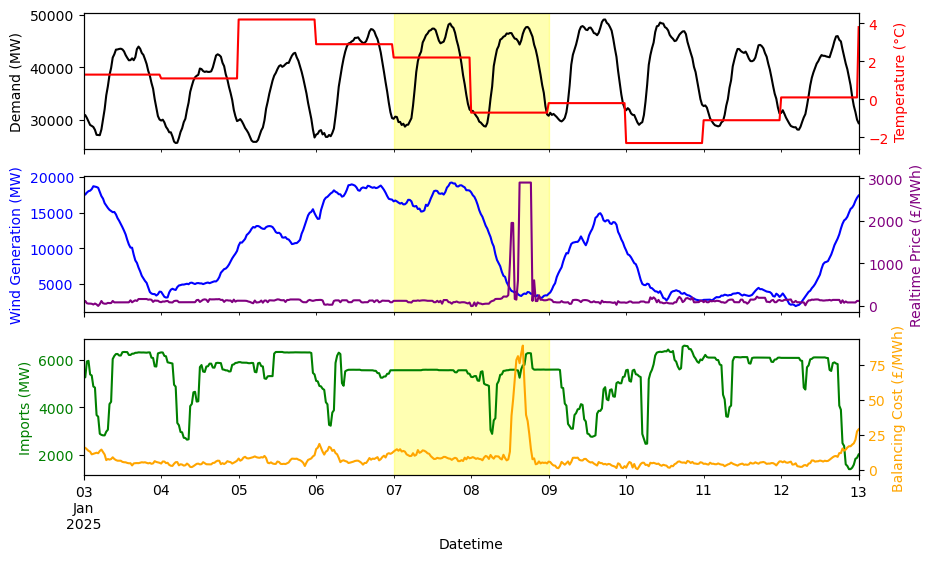

In [16]:
# -------------------
# Now do the same plot, but with the smoothed data
# -------------------

# Set up a figure with three rows and one column
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = ax1.twinx()
ax2 = axs[1]
ax2_b = ax2.twinx()
ax3 = axs[2]
ax3_b = ax3.twinx()

# Plot the demand column
filtered_data_hourly['Demand (MW)'].plot(ax=ax1, color='k', label='Demand')

# Plot the temperature in red on the first subplot
filtered_data_hourly['Temper-ature (°C)'].plot(ax=ax1_b, color='red', label='Temperature')

# Set the labels and title for the first subplot
ax1.set_ylabel('Demand (MW)', fontsize=10, color='k')
ax1_b.set_ylabel('Temperature (°C)', fontsize=10, color='red')

# Highlight the ticks in the correct colours
ax1.tick_params(axis='y', labelcolor='k')
ax1_b.tick_params(axis='y', labelcolor='red')

# Highlight the period of the event in yellow
ax1.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# Plot the wind availability in blue on the second subplot
filtered_data_hourly['Wind Available'].plot(ax=ax2, color='blue', label='Wind Available')

# # Plot the wind curtailed in black
# filtered_data_hourly['Wind Curtailed'].plot(ax=ax2, color='black', label='Wind Curtailed')

# Plot the Realtime price in purple on the second subplot
filtered_data_hourly['Realtime'].plot(ax=ax2_b, color='purple', label='Realtime Price')

# Set the labels and title for the second subplot
ax2.set_ylabel('Wind Generation (MW)', fontsize=10, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2_b.set_ylabel('Realtime Price (£/MWh)', fontsize=10, color='purple')
# Highlight the ticks in the correct colours
ax2_b.tick_params(axis='y', labelcolor='purple')

# Highlight the period of the event in yellow
ax2.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# Plot the imports on ax3
filtered_data_hourly['Gross Imports'].plot(ax=ax3, color='green', label='Imports')

# Plot the balancing cost in orange on the third subplot
filtered_data_hourly['Balancing'].plot(ax=ax3_b, color='orange', label='Balancing Cost')

# Set the labels and title for the third subplot
ax3.set_ylabel('Imports (MW)', fontsize=10, color='green')
ax3.tick_params(axis='y', labelcolor='green')

ax3_b.set_ylabel('Balancing Cost (£/MWh)', fontsize=10, color='orange')
# Highlight the ticks in the correct colours
ax3_b.tick_params(axis='y', labelcolor='orange')

# Highlight the period of the event in yellow
ax3.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

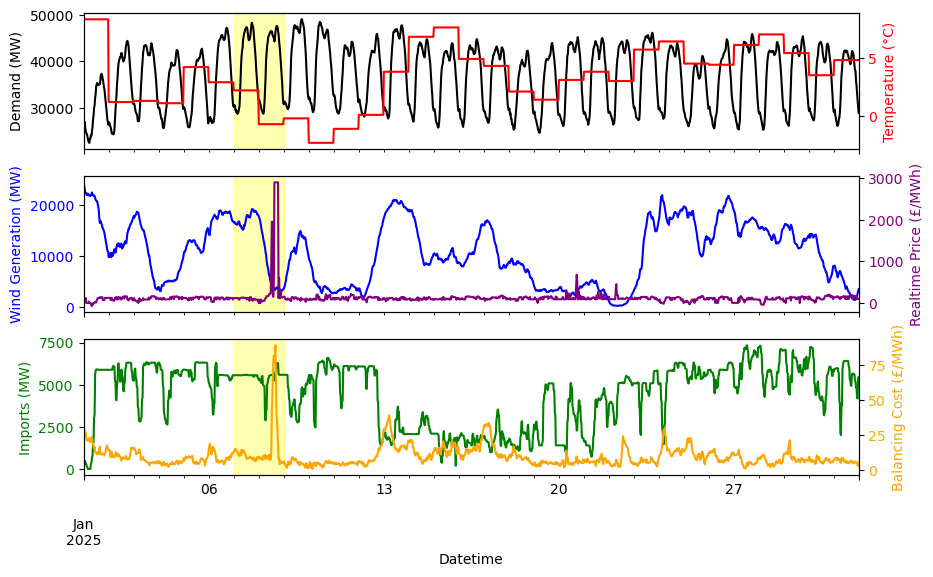

In [17]:
# -------------------
# Now do the same plot, but with the smoothed data
# -------------------

# Set up a figure with three rows and one column
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = ax1.twinx()
ax2 = axs[1]
ax2_b = ax2.twinx()
ax3 = axs[2]
ax3_b = ax3.twinx()

# Plot the demand column
filtered_data_hourly_january['Demand (MW)'].plot(ax=ax1, color='k', label='Demand')

# Plot the temperature in red on the first subplot
filtered_data_hourly_january['Temper-ature (°C)'].plot(ax=ax1_b, color='red', label='Temperature')

# Set the labels and title for the first subplot
ax1.set_ylabel('Demand (MW)', fontsize=10, color='k')
ax1_b.set_ylabel('Temperature (°C)', fontsize=10, color='red')

# Highlight the ticks in the correct colours
ax1.tick_params(axis='y', labelcolor='k')
ax1_b.tick_params(axis='y', labelcolor='red')

# Highlight the period of the event in yellow
ax1.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# Plot the wind availability in blue on the second subplot
filtered_data_hourly_january['Wind Available'].plot(ax=ax2, color='blue', label='Wind Available')

# # Plot the wind curtailed in black
# filtered_data_hourly_january['Wind Curtailed'].plot(ax=ax2, color='black', label='Wind Curtailed')

# Plot the Realtime price in purple on the second subplot
filtered_data_hourly_january['Realtime'].plot(ax=ax2_b, color='purple', label='Realtime Price')

# Set the labels and title for the second subplot
ax2.set_ylabel('Wind Generation (MW)', fontsize=10, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2_b.set_ylabel('Realtime Price (£/MWh)', fontsize=10, color='purple')
# Highlight the ticks in the correct colours
ax2_b.tick_params(axis='y', labelcolor='purple')

# Highlight the period of the event in yellow
ax2.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# Plot the imports on ax3
filtered_data_hourly_january['Gross Imports'].plot(ax=ax3, color='green', label='Imports')

# Plot the balancing cost in orange on the third subplot
filtered_data_hourly_january['Balancing'].plot(ax=ax3_b, color='orange', label='Balancing Cost')

# Set the labels and title for the third subplot
ax3.set_ylabel('Imports (MW)', fontsize=10, color='green')
ax3.tick_params(axis='y', labelcolor='green')

ax3_b.set_ylabel('Balancing Cost (£/MWh)', fontsize=10, color='orange')
# Highlight the ticks in the correct colours
ax3_b.tick_params(axis='y', labelcolor='orange')

# Highlight the period of the event in yellow
ax3.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

In [25]:
filtered_data_hourly_january.columns

Index(['Nuclear', 'Biomass', 'Imports', 'Hydro', 'Wind', 'Solar', 'Gas',
       'Coal', 'Peaking', 'French', 'Dutch', 'Irish', 'Belgian', 'Norwegian',
       'Danish', 'Storage', 'Gross Imports', 'Gross Exports', 'Demand (MW)',
       'Demand Net (MW)', 'Fossil (MW)', 'Carbon (tCO₂/hr)', 'Carbon (g/kWh)',
       'Day Ahead', 'Realtime', 'Balancing', 'Temper-ature (°C)',
       'Wind Curtailed', 'Wind Available'],
      dtype='object')

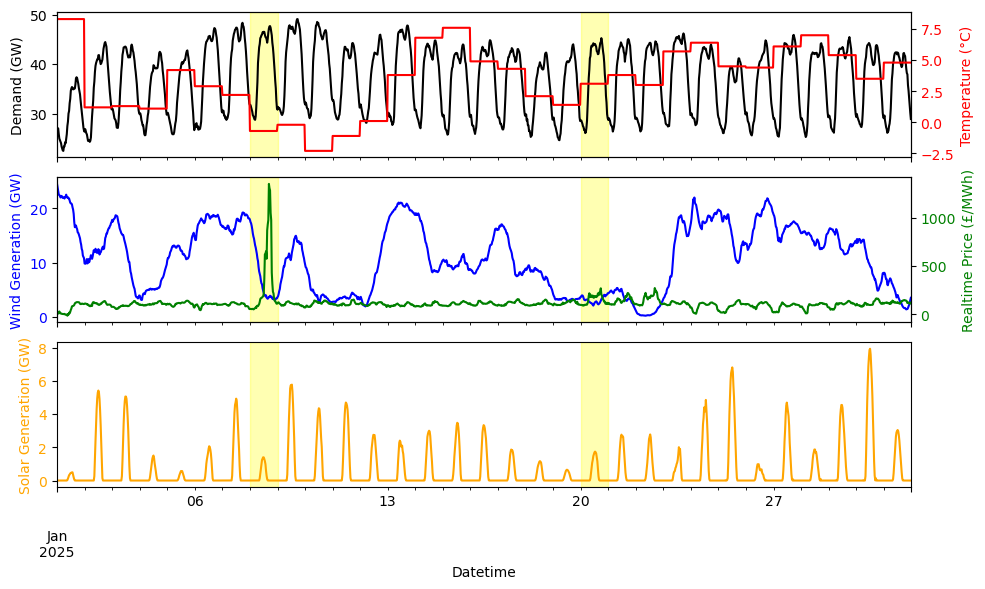

In [33]:
# Set the event date as the 20th January 2025
late_jan_event_date = pd.Timestamp("2025-01-20")

# Set the start date and end date for the analysis
late_jan_start_date = late_jan_event_date - pd.Timedelta(days=5)
late_jan_end_date = late_jan_event_date + pd.Timedelta(days=5)

# -------------------
# Now do the same plot, but with the smoothed data
# -------------------

# Set up a figure with three rows and one column
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = ax1.twinx()
ax2 = axs[1]
ax2_b = ax2.twinx()
ax3 = axs[2]
# ax3_b = ax3.twinx()

# Plot the demand column (convert MW to GW)
(filtered_data_hourly_january['Demand (MW)'] / 1000).plot(ax=ax1, color='k', label='Demand')

# Plot the temperature in red on the first subplot
filtered_data_hourly_january['Temper-ature (°C)'].plot(ax=ax1_b, color='red', label='Temperature')

# Set the labels and title for the first subplot
ax1.set_ylabel('Demand (GW)', fontsize=10, color='k')
ax1_b.set_ylabel('Temperature (°C)', fontsize=10, color='red')

# Highlight the ticks in the correct colours
ax1.tick_params(axis='y', labelcolor='k')
ax1_b.tick_params(axis='y', labelcolor='red')

# Highlight the period of the event in yellow
ax1.axvspan(late_jan_event_date, late_jan_event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# Plot the wind availability in blue on the second subplot (convert MW to GW)
(filtered_data_hourly_january['Wind Available'] / 1000).plot(ax=ax2, color='blue', label='Wind Available')

# # Plot the wind curtailed in black
# filtered_data_hourly_january['Wind Curtailed'].plot(ax=ax2, color='black', label='Wind Curtailed')

# Plot the Realtime price in purple on the second subplot
filtered_data_hourly_january['Day Ahead'].plot(ax=ax2_b, color='green', label='Realtime Price')

# Set the labels and title for the second subplot
ax2.set_ylabel('Wind Generation (GW)', fontsize=10, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2_b.set_ylabel('Realtime Price (£/MWh)', fontsize=10, color='green')
# Highlight the ticks in the correct colours
ax2_b.tick_params(axis='y', labelcolor='green')

# Set the ylims here
# ax2_b.set_ylim(0, 400)  # Set y-limits for the Realtime price

# Highlight the period of the event in yellow
ax2.axvspan(late_jan_event_date, late_jan_event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# Plot the imports on ax3 (convert MW to GW)
(filtered_data_hourly_january['Solar'] / 1000).plot(ax=ax3, color='orange', label='Solar')

# # Plot the balancing cost in orange on the third subplot
# filtered_data_hourly_january['Balancing'].plot(ax=ax3_b, color='purple', label='Balancing Cost')

# Set the labels and title for the third subplot
ax3.set_ylabel('Solar Generation (GW)', fontsize=10, color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# ax3_b.set_ylabel('Balancing Cost (£/MWh)', fontsize=10, color='purple')
# # Highlight the ticks in the correct colours
# ax3_b.tick_params(axis='y', labelcolor='purple')

# Highlight the period of the event in yellow
ax3.axvspan(late_jan_event_date, late_jan_event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# # Set the x-axis limits to between the start and end date
# ax1.set_xlim(start_date, end_date)
# ax2.set_xlim(start_date, end_date)
# ax3.set_xlim(start_date, end_date)

ax1.axvspan(event_date, event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')
ax2.axvspan(event_date, event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')
ax3.axvspan(event_date, event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# Set a tight layout
plt.tight_layout()

In [26]:
# Print the head of the filtered data
filtered_data_hourly.head()

,Nuclear,Biomass,Imports,Hydro,Wind,Solar,Gas,Coal,Peaking,French,...,Demand Net (MW),Fossil (MW),Carbon (tCO₂/hr),Carbon (g/kWh),Day Ahead,Realtime,Balancing,Temper-ature (°C),Wind Curtailed,Wind Available
Datetime,,,,,,,,,,,,,,,,,,,,,
2025-01-03 00:00:00,5047.0,2047.0,4229.0,720.0,15610.0,0,3352.0,0,1.0,1445,...,15396.0,3353.0,1714.371922,55.291618,77.97,72.0,15.7598,1.3,2247,17857.0
2025-01-03 00:30:00,5045.0,2072.0,4104.0,705.0,15471.0,0,3500.0,0,1.0,1458,...,15427.0,3501.0,1776.150551,57.484321,79.02,115.0,15.9997,1.3,2057,17528.0
2025-01-03 01:00:00,5049.0,2064.0,3628.0,687.0,15748.0,0,3183.0,0,1.0,2167,...,14612.0,3184.0,1666.735873,54.899074,77.94,60.0,14.9271,1.3,2066,17814.0
2025-01-03 01:30:00,5045.0,2068.0,3436.0,673.0,15900.0,0,2571.0,0,1.0,2196,...,13794.0,2572.0,1435.709625,48.350159,75.27,52.0,13.8391,1.3,2114,18014.0
2025-01-03 02:00:00,5030.0,2064.0,2902.0,658.0,16052.0,0,2318.0,0,1.0,1631,...,12973.0,2319.0,1328.162895,45.759273,72.19,52.0,13.2476,1.3,2032,18084.0


In [ ]:
# -------------------
# Do the same plot, but with the hourly data
# -------------------

# Set up a figure with three rows and one column
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Set up the axes
ax1 = axs[0]
ax1_b = ax1.twinx()
ax2 = axs[1]
ax2_b = ax2.twinx()
ax3 = axs[2]
ax3_b = ax3.twinx()

# Plot the demand column
filtered_data['Demand (MW)'].plot(ax=ax1, color='k', label='Demand')

# Plot the temperature in red on the first subplot
filtered_data['Temper-ature (°C)'].plot(ax=ax1_b, color='red', label='Temperature')

# Set the labels and title for the first subplot
ax1.set_ylabel('Demand (MW)', fontsize=10, color='k')
ax1_b.set_ylabel('Temperature (°C)', fontsize=10, color='red')

# Highlight the ticks in the correct colours
ax1.tick_params(axis='y', labelcolor='k')
ax1_b.tick_params(axis='y', labelcolor='red')

# Highlight the period of the event in yellow
ax1.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# Plot the wind availability in blue on the second subplot
filtered_data['Wind Available'].plot(ax=ax2, color='blue', label='Wind Available')

# # Plot the wind curtailed in black
# filtered_data['Wind Curtailed'].plot(ax=ax2, color='black', label='Wind Curtailed')

# Plot the Realtime price in purple on the second subplot
filtered_data['Realtime'].plot(ax=ax2_b, color='purple', label='Realtime Price')

# Set the labels and title for the second subplot
ax2.set_ylabel('Wind Generation (MW)', fontsize=10, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2_b.set_ylabel('Realtime Price (£/MWh)', fontsize=10, color='purple')
# Highlight the ticks in the correct colours
ax2_b.tick_params(axis='y', labelcolor='purple')

# Highlight the period of the event in yellow
ax2.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')

# Plot the imports on ax3
filtered_data['Gross Imports'].plot(ax=ax3, color='orange', label='Imports')

# Plot the balancing cost in orange on the third subplot
filtered_data['Balancing'].plot(ax=ax3_b, color='purple', label='Balancing Cost')

# Set the labels and title for the third subplot
ax3.set_ylabel('Imports (MW)', fontsize=10, color='green')
ax3.tick_params(axis='y', labelcolor='green')

ax3_b.set_ylabel('Balancing Cost (£/MWh)', fontsize=10, color='purple')
# Highlight the ticks in the correct colours
ax3_b.tick_params(axis='y', labelcolor='orange')

# Highlight the period of the event in yellow
ax3.axvspan(event_date - pd.Timedelta(days=1), event_date + pd.Timedelta(days=1), color='yellow', alpha=0.3, label='Event Period')